In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq
from PIL import Image as img

In [4]:
folder = "Muestras_12.11.24"

In [5]:
def create_directory(path):
    directory = []
    for filename in filter(lambda p: p.endswith("txt"),os.listdir(path)):
        filepath = os.path.join(path,filename)
        directory.append(filepath)
    return directory

In [6]:
def extract_data(filepath):
    df = pd.read_csv(filepath,names=["1","2"],sep="\t")
    return df

In [11]:
def graph_data(directory):
    for filepath in directory:
        raman_df = extract_data(filepath)
        fig = plt.figure(figsize=(20,5))
        ax = fig.add_subplot(1,1,1)
        raman_shift = raman_df["1"][raman_df['1']>1200]
        arb_intensity= raman_df["2"][raman_df['1']>1200]
        ax.plot(raman_shift,arb_intensity,linewidth=1,label='Espectro del Grafeno',color="b")
        ax.grid()
        ax.set_ylabel('Intensity [Arbs]')
        ax.set_xlabel('Raman Shift [cm^-1]')
        ax.set_title(filepath[:-4])
        ax.legend()
        plt.savefig(filepath[:-4])
        plt.show()

In [12]:
def generate_catalog_entries(path):
    sample = []
    concat = []
    for sample_filename in filter(lambda p: p.endswith("espectros.png"),os.listdir(path)):
        filters=[lambda p: p.startswith(sample_filename[:-14]),lambda p: p.endswith("png"),lambda p: p != sample_filename, lambda p: p !=sample_filename[:-14]+"_concatenado.png"]
        graph_catalog =[]
        for graph_filename in filter(lambda p: all([f(p) for f in filters]),os.listdir(path)):
            graph_filepath = os.path.join(path,graph_filename)
            graph_catalog.append(graph_filepath)
        conc_graphs = img.new("RGB", (2000, 500*len(graph_catalog)))
        for i in range(0,len(graph_catalog)):
            graph = img.open(graph_catalog[i])
            conc_graphs.paste(graph, (0, 500*i))
        sample_filepath = os.path.join(path,sample_filename)
        conc_graphs.save(sample_filepath[:-14]+"_concatenado.png")
        concat_filepath = sample_filepath[:-14]+"_concatenado.png"
        concat.append(concat_filepath)
        sample.append(sample_filepath)
    return sample, concat

In [42]:
def anex_to_catalog(sample,concat):
    for i in range (0,len(sample)):
        catalog_entry = img.new("RGB", (2480, 3508))
        i_sample = img.open(sample[i])
        i_graphs = img.open(concat[i])
        catalog_entry.paste(i_sample,(240,240))
        catalog_entry.paste(i_graphs,(240,900))
        catalog_entry.save(sample[i][:-14]+"_catalog_entry.png")
        os.rename(sample[i][0:-14]+"_catalog_entry.png","catalogo"+sample[i][17:-14]+"_catalog_entry.png")

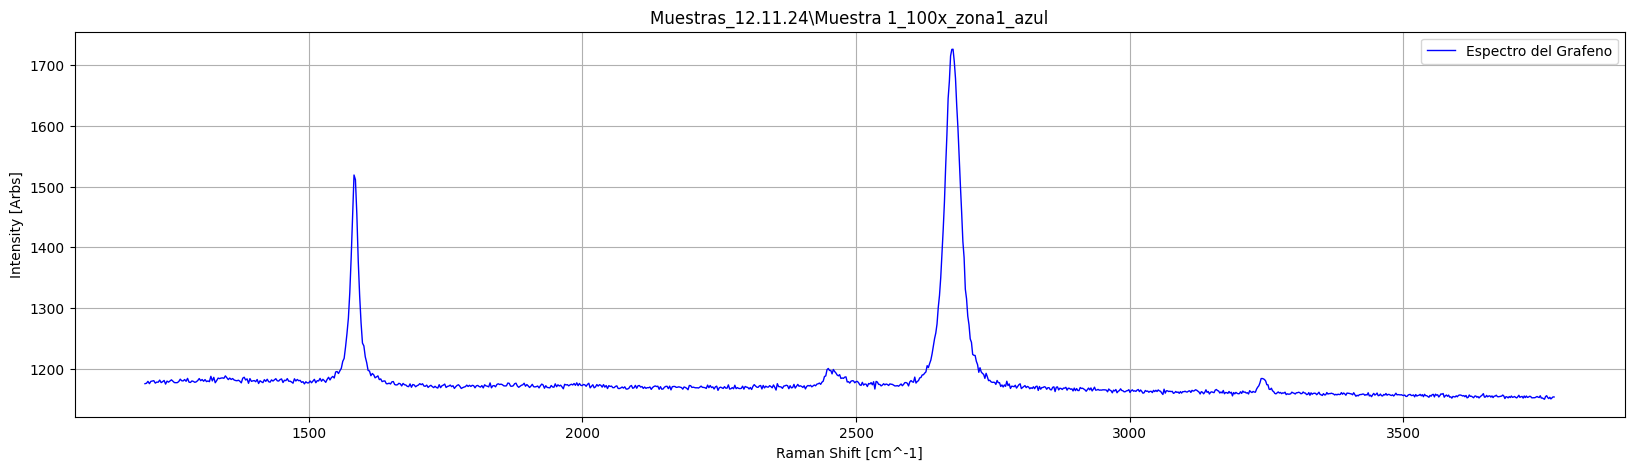

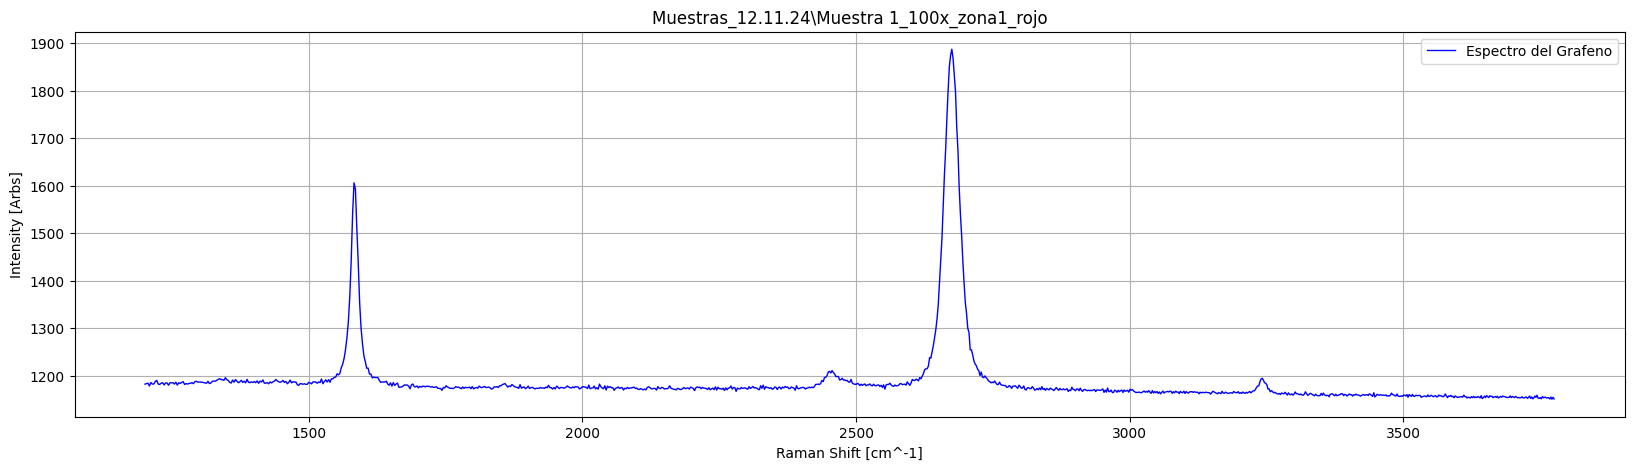

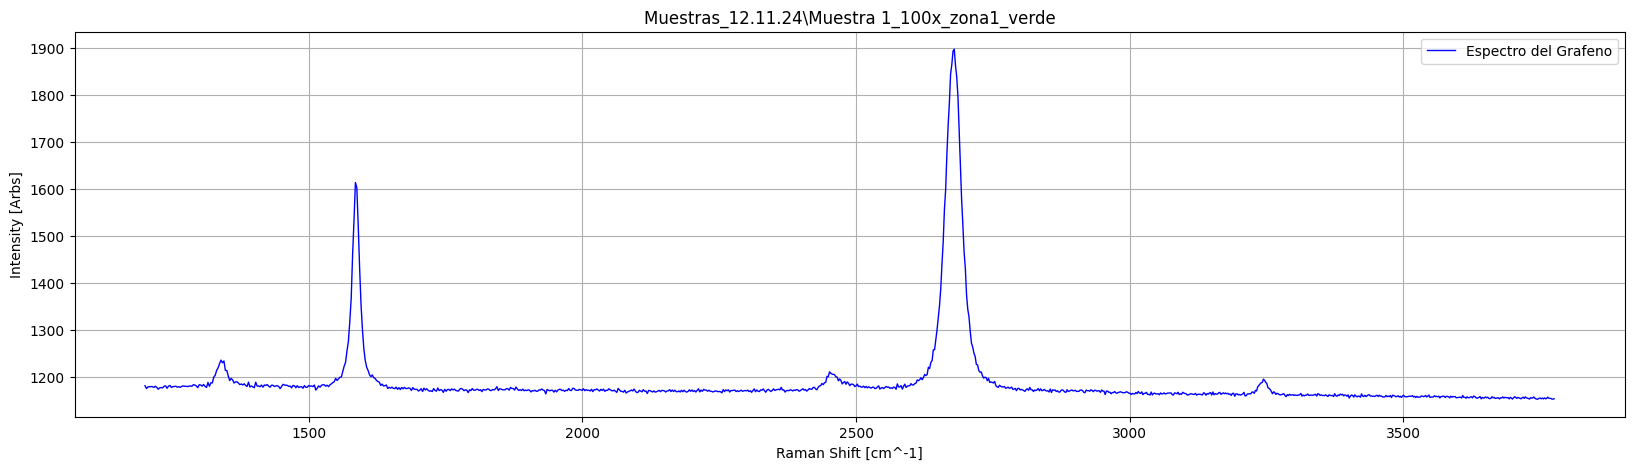

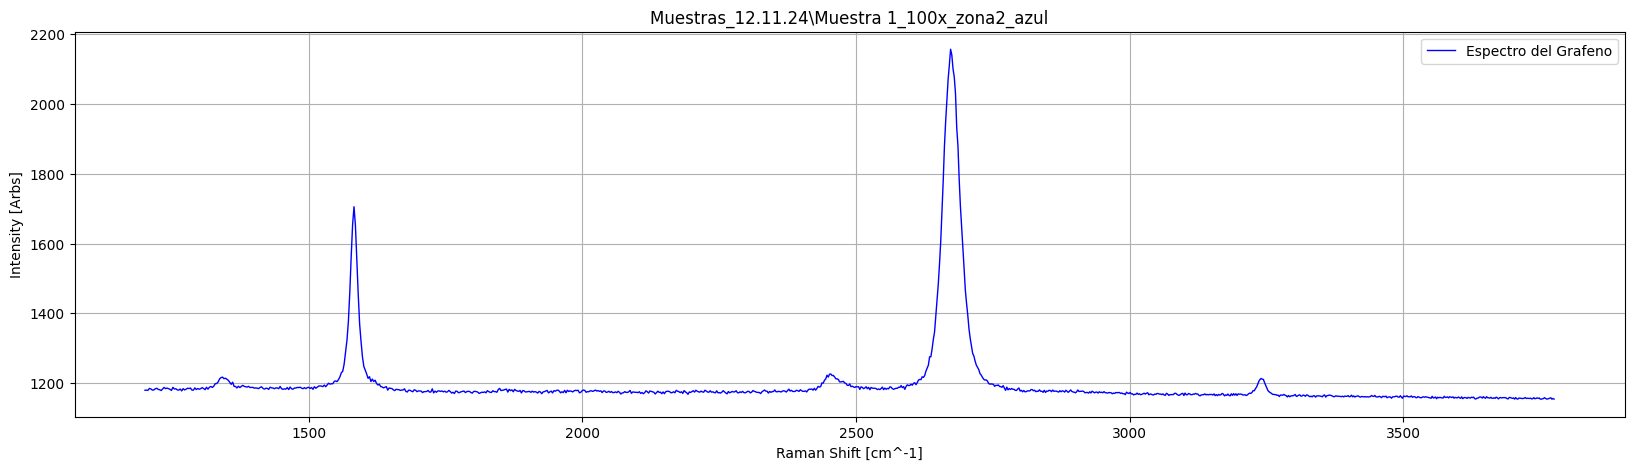

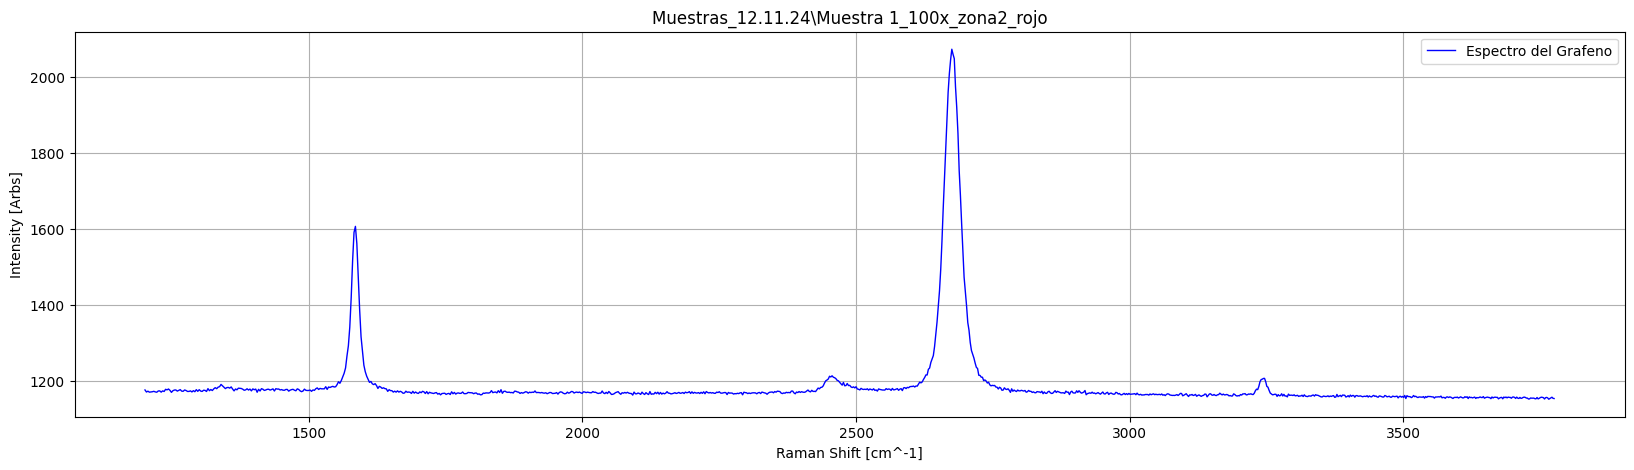

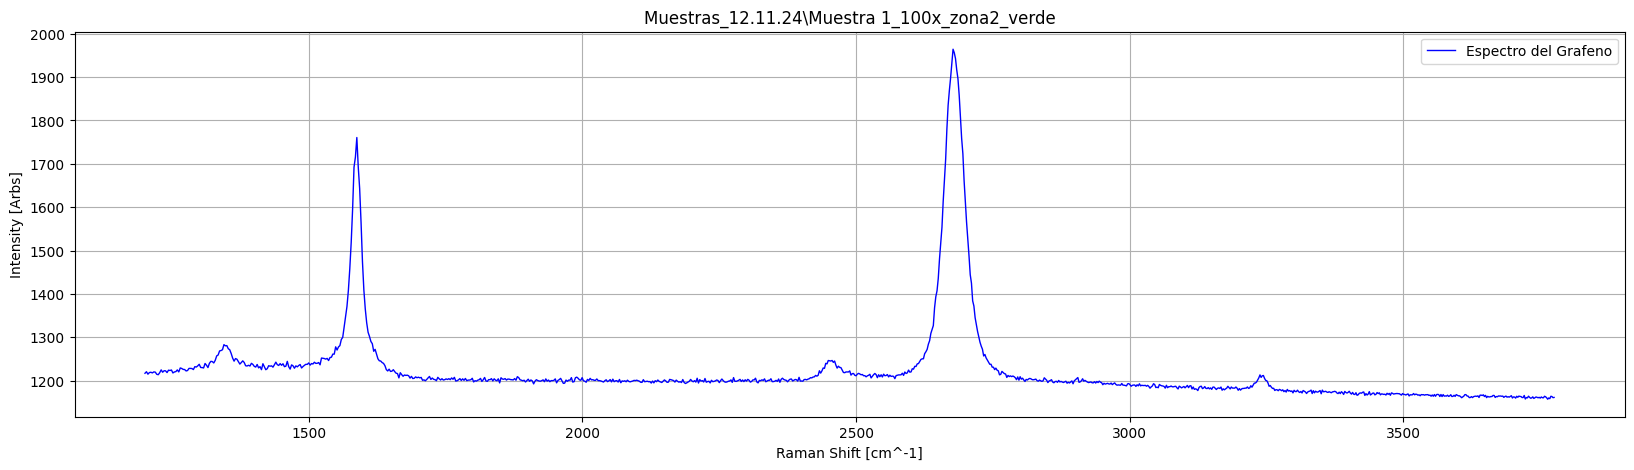

In [43]:
directory = create_directory(folder)
graph_data(directory)
sample, concat = generate_catalog_entries(folder)
anex_to_catalog(sample, concat)